# Computing with dimensions

In the previous chapter, we have seen that we could apply functions to arrays. In those cases the input was one or more arrays and the output was also an array of the same size. There are also functions that can *change* the dimensions of the input. A typically example is the projection of 3D data into 2D.

First let's import an image:

In [2]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
from microfilm.microplot import microshow

image = skimage.io.imread('../data/cellatlas/19838_1252_F8_1.tiff')

## Computing statistics

The simplest case that we consider here is to summarize an image (or an entire stack) as a single number. For example ```image``` has 3 dimensions:

In [3]:
image.shape

(2048, 2048, 3)

We can now compute statistics of the entire image. For this we can use a series of functions like ```np.mean```, ```np.std``` etc.:

In [4]:
np.mean(image)

10.345695813496908

In [5]:
np.std(image)

32.7190798155437

In this specific case it rather makes sense to compute the statistics for each channel individually, so we would compute:

In [6]:
np.mean(image[0])

12.4619140625

## Projections

All the statistical functions described above take an additional argument ```axis``` that allows us to specify *along which dimension* we want to compute a statistic. So if we have a volume, we can *project* it along the volume (or Z) dimensions. Let's import such a dataset:

In [21]:
image3d = skimage.io.imread('../data/drosophila_embryo_30567.tif')[0]

In [22]:
image3d.shape

(5, 2, 206, 246)

Here we have two channels and each of them has 5 planes. Let's for the moment just keep one channel:

In [23]:
im_ch1 = image3d[:,0]

im_ch1.shape

(5, 206, 246)

Now we can compute the projection along the z axis, which in this case is the *first* axis:

In [24]:
im_ch1_proj = np.max(im_ch1, axis=0)

or equivalently:

In [25]:
im_ch1_proj = im_ch1.max(axis=0)

In [26]:
im_ch1_proj.shape

(206, 246)

As we see above, we obtain as expected an image that has the same number of XY pixels as the original volume but that is just a single image. We can also look at it:

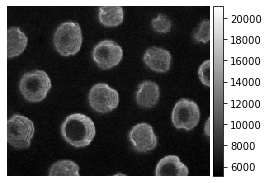

In [27]:
microshow(im_ch1_proj, show_colorbar=True);

Just like in Fiji for example we can choose whether our projection should be a maximum, sum, average etc. projection, here we just have to pick the right function. For example for a sum projection:

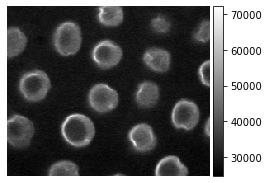

In [28]:
im_ch1_proj_sum = im_ch1.sum(axis=0)

microshow(im_ch1_proj_sum, show_colorbar=True);

The difference is not large, but from the colorbar we clearly see that the projections were computed in a different way.

If we come back to our original dataset with three channels, we could compute the projection of *all channels* in one go:

In [29]:
image3d.max(axis=0).shape

(2, 206, 246)

As we can see above, we specified that the max projection should be done along the first axis (z) and the *two other dimensions* are left untouched. This allows us then to look at a composite projection:

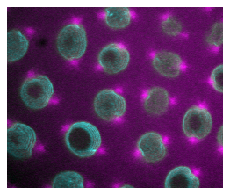

In [30]:
microshow(image3d.max(axis=0));

## Exercise

Load the file ```S9_File_PVM_Rupture_crop.tif``` file and try various projections (max, min, sum etc). Try also along different axis and plot the result.